### Importação dos dados



In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [41]:
# prompt: Usando o DataFrame loja: # Mostrar as colunas do primeiro DataFrame para descobrir o nome real da coluna de preço
# print("Colunas disponíveis em loja1:")
# print(loja1.columns)

# Display the columns of the first DataFrame to find the real name of the price column
print("Colunas disponíveis em loja:")
loja.columns

Colunas disponíveis em loja:


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

#1. Análise do faturamento


In [42]:
# Calculando o faturamento de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [43]:
# Criando DataFrames e ordenando do maior para o menor faturamento
faturamento_por_categoria_loja1 = loja.groupby("Categoria do Produto")["Preço"].sum()
faturamento_por_categoria_loja2 = loja2.groupby("Categoria do Produto")["Preço"].sum()
faturamento_por_categoria_loja3 = loja3.groupby("Categoria do Produto")["Preço"].sum()
faturamento_por_categoria_loja4 = loja4.groupby("Categoria do Produto")["Preço"].sum()

df_faturamento_loja1 = faturamento_por_categoria_loja1.reset_index().sort_values(by="Preço", ascending=False)
df_faturamento_loja2 = faturamento_por_categoria_loja2.reset_index().sort_values(by="Preço", ascending=False)
df_faturamento_loja3 = faturamento_por_categoria_loja3.reset_index().sort_values(by="Preço", ascending=False)
df_faturamento_loja4 = faturamento_por_categoria_loja4.reset_index().sort_values(by="Preço", ascending=False)

print("\nFaturamento por categoria - Loja 1 (ordenado):")
print(df_faturamento_loja1)

print("\nFaturamento por categoria - Loja 2 (ordenado):")
print(df_faturamento_loja2)

print("\nFaturamento por categoria - Loja 3 (ordenado):")
print(df_faturamento_loja3)

print("\nFaturamento por categoria - Loja 4 (ordenado):")
print(df_faturamento_loja4)


Faturamento por categoria - Loja 1 (ordenado):
    Categoria do Produto      Preço
2            eletronicos  572659.23
1       eletrodomesticos  484913.36
6                 moveis  250178.11
4  instrumentos musicais  121731.69
3        esporte e lazer   52387.55
0             brinquedos   23993.78
7  utilidades domesticas   16931.48
5                 livros   11713.92

Faturamento por categoria - Loja 2 (ordenado):
    Categoria do Produto      Preço
2            eletronicos  547773.71
1       eletrodomesticos  464758.13
6                 moveis  235234.68
4  instrumentos musicais  139987.03
3        esporte e lazer   46326.09
0             brinquedos   21262.21
7  utilidades domesticas   19662.86
5                 livros   13454.35

Faturamento por categoria - Loja 3 (ordenado):
    Categoria do Produto      Preço
2            eletronicos  547699.92
1       eletrodomesticos  438984.89
6                 moveis  268095.56
4  instrumentos musicais  103174.45
3        esporte e lazer   4

# 3. Média de Avaliação das Lojas

In [45]:
media_avaliacao_loja1 = loja["Avaliação da compra"].dropna().mean()

# Calculando a média de avaliação para cada loja
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

# Exibindo os resultados formatados
print(f"Média de avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

Média de avaliação - Loja 1: 3.98
Média de avaliação - Loja 2: 4.04
Média de avaliação - Loja 3: 4.05
Média de avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [46]:
# Contando a quantidade de vendas por produto (considerando repetição de registros)
produtos_mais_vendidos_loja1 = loja["Produto"].value_counts().reset_index()
produtos_mais_vendidos_loja2 = loja2["Produto"].value_counts().reset_index()
produtos_mais_vendidos_loja3 = loja3["Produto"].value_counts().reset_index()
produtos_mais_vendidos_loja4 = loja4["Produto"].value_counts().reset_index()

# Renomeando colunas para melhor identificação
produtos_mais_vendidos_loja1.columns = ["Produto", "Quantidade Vendida"]
produtos_mais_vendidos_loja2.columns = ["Produto", "Quantidade Vendida"]
produtos_mais_vendidos_loja3.columns = ["Produto", "Quantidade Vendida"]
produtos_mais_vendidos_loja4.columns = ["Produto", "Quantidade Vendida"]

# Ordenando do mais vendido para o menos vendido
produtos_mais_vendidos_loja1 = produtos_mais_vendidos_loja1.sort_values(by="Quantidade Vendida", ascending=False)
produtos_mais_vendidos_loja2 = produtos_mais_vendidos_loja2.sort_values(by="Quantidade Vendida", ascending=False)
produtos_mais_vendidos_loja3 = produtos_mais_vendidos_loja3.sort_values(by="Quantidade Vendida", ascending=False)
produtos_mais_vendidos_loja4 = produtos_mais_vendidos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

# Exibindo os cinco produtos mais vendidos
print("Top 5 produtos mais vendidos - Loja 1:")
print(produtos_mais_vendidos_loja1.head())

print("\nTop 5 produtos mais vendidos - Loja 2:")
print(produtos_mais_vendidos_loja2.head())

print("\nTop 5 produtos mais vendidos - Loja 3:")
print(produtos_mais_vendidos_loja3.head())

print("\nTop 5 produtos mais vendidos - Loja 4:")
print(produtos_mais_vendidos_loja4.head())

# Exibindo os cinco produtos menos vendidos
print("\nTop 5 produtos menos vendidos - Loja 1:")
print(produtos_mais_vendidos_loja1.tail())

print("\nTop 5 produtos menos vendidos - Loja 2:")
print(produtos_mais_vendidos_loja2.tail())

print("\nTop 5 produtos menos vendidos - Loja 3:")
print(produtos_mais_vendidos_loja3.tail())

print("\nTop 5 produtos menos vendidos - Loja 4:")
print(produtos_mais_vendidos_loja4.tail())

Top 5 produtos mais vendidos - Loja 1:
              Produto  Quantidade Vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              Cômoda                  56

Top 5 produtos mais vendidos - Loja 2:
                    Produto  Quantidade Vendida
0  Iniciando em programação                  65
1               Micro-ondas                  62
2                   Bateria                  61
3                    Violão                  58
4                  Pandeiro                  58

Top 5 produtos mais vendidos - Loja 3:
           Produto  Quantidade Vendida
0    Kit banquetas                  57
1   Mesa de jantar                  56
2        Cama king                  56
3  Jogo de panelas                  55
4           Cômoda                  55

Top 5 produtos mais vendidos - Loja 4:
                    Produto  Quantidade Vendida
0                  

# 5. Frete Médio por Loja


In [47]:
frete_medio_loja1 = loja["Frete"].dropna().mean()

# Calculando o frete médio por loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibindo os resultados formatados
print(f"Frete médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R$ {frete_medio_loja4:.2f}")

Frete médio - Loja 1: R$ 34.69
Frete médio - Loja 2: R$ 33.62
Frete médio - Loja 3: R$ 33.07
Frete médio - Loja 4: R$ 31.28


# 6. Gráficos


<ipython-input-49-f5c43a80f3f8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loja", y="Faturamento", data=dados_lojas, palette="Blues")


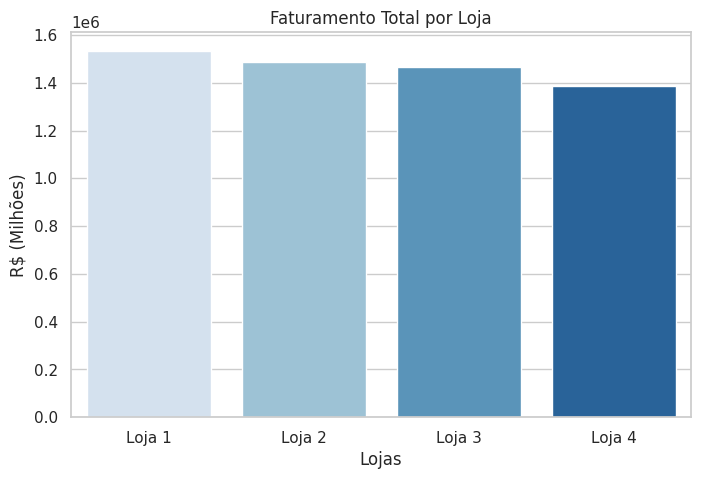

<ipython-input-49-f5c43a80f3f8>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loja", y="Frete Médio", data=dados_lojas, palette="Oranges")


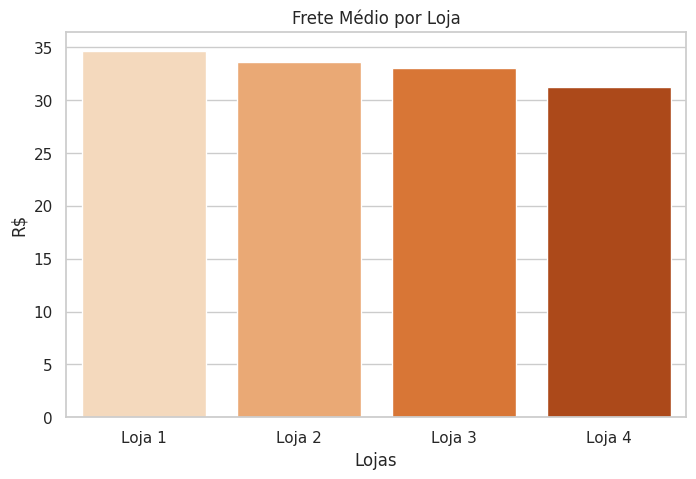

<ipython-input-49-f5c43a80f3f8>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loja", y="Avaliação Média", data=dados_lojas, palette="Greens")


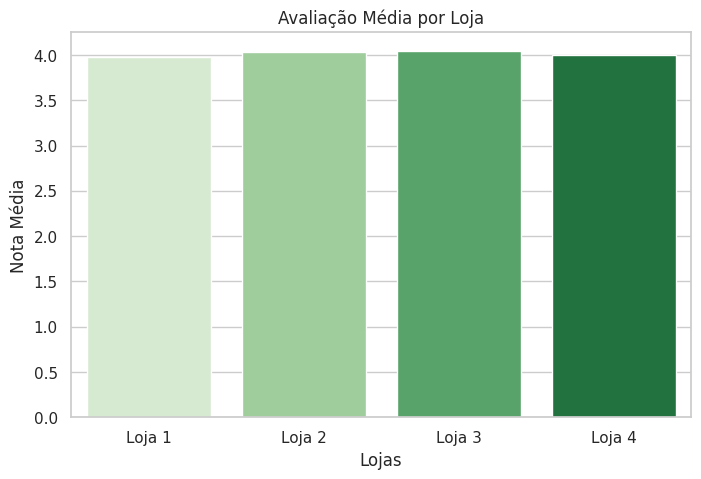

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame com os dados
import pandas as pd

dados_lojas = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4],
    "Frete Médio": [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4],
    "Avaliação Média": [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
})

# Configuração do estilo dos gráficos
sns.set_theme(style="whitegrid")

# 📈 Gráfico 1: Faturamento total por loja
plt.figure(figsize=(8,5))
sns.barplot(x="Loja", y="Faturamento", data=dados_lojas, palette="Blues")
plt.title("Faturamento Total por Loja")
plt.ylabel("R$ (Milhões)")
plt.xlabel("Lojas")
plt.show()

# 🚚 Gráfico 2: Frete médio por loja
plt.figure(figsize=(8,5))
sns.barplot(x="Loja", y="Frete Médio", data=dados_lojas, palette="Oranges")
plt.title("Frete Médio por Loja")
plt.ylabel("R$")
plt.xlabel("Lojas")
plt.show()

# ⭐ Gráfico 3: Avaliação média por loja
plt.figure(figsize=(8,5))
sns.barplot(x="Loja", y="Avaliação Média", data=dados_lojas, palette="Greens")
plt.title("Avaliação Média por Loja")
plt.ylabel("Nota Média")
plt.xlabel("Lojas")
plt.show()

# 7. Relatório

Por ser a que menos fatura, mesmo tendo um boas avaliações, sugiro a loja 4.